##Python project for churn analysis prediction using customer data

In [1]:
#import libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns


In [2]:
#import the data
customer_data = pd.read_csv('Customer_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#data info
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerKey            60398 non-null  int64  
 1   GeographyKey           60398 non-null  int64  
 2   CustomerAlternateKey   60398 non-null  object 
 3   Title                  307 non-null    object 
 4   FirstName              60398 non-null  object 
 5   MiddleName             34903 non-null  object 
 6   LastName               60398 non-null  object 
 7   NameStyle              60398 non-null  int64  
 8   BirthDate              60398 non-null  object 
 9   MaritalStatus          60398 non-null  object 
 10  Suffix                 6 non-null      object 
 11  Gender                 60398 non-null  object 
 12  EmailAddress           60398 non-null  object 
 13  YearlyIncome           60398 non-null  float64
 14  TotalChildren          60398 non-null  int64  
 15  Nu

In [4]:
customer_data['DateFirstPurchase'] = pd.to_datetime(customer_data.DateFirstPurchase, format='%Y-%m-%d')
customer_data['BirthDate'] = pd.to_datetime(customer_data.BirthDate, format='%Y-%m-%d')
customer_data['OrderDate'] = pd.to_datetime(customer_data.OrderDate, format='%Y-%m-%d')

In [5]:
#drop the columns that are not needed
dataset = customer_data.drop(['CarrierTrackingNumber', 'CustomerKey.1', 'CustomerPONumber', 'DueDate', 'DueDateKey', 
                              'ExtendedAmount', 'Freight', 'OrderDateKey', 'ProductKey', 'ProductStandardCost', 'PromotionKey', 
                              'RevisionNumber', 'SalesOrderLineNumber', 'SalesOrderNumber', 'ShipDate', 'ShipDateKey', 'TaxAmt', 
                              'TotalProductCost', 'UnitPrice', 'UnitPriceDiscountPct', 'AddressLine1', 'AddressLine2', 
                              'CustomerAlternateKey', 'EmailAddress', 'FirstName', 'FrenchEducation', 'FrenchOccupation', 
                              'LastName', 'MiddleName', 'NameStyle', 'Phone', 'SpanishEducation', 'SpanishOccupation', 'Suffix', 
                              'Title'], axis = 1)


In [6]:
dataset.head()

,CustomerKey,GeographyKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,CurrencyKey,SalesTerritoryKey,OrderQuantity,DiscountAmount,SalesAmount,OrderDate
0,11015,301,1984-08-26,S,F,30000.0,0,0,Partial College,Skilled Manual,0,1,2013-01-18,5-10 Miles,100,4,1,0,2319.99,2013-01-18
1,11015,301,1984-08-26,S,F,30000.0,0,0,Partial College,Skilled Manual,0,1,2013-01-18,5-10 Miles,100,4,1,0,21.98,2013-01-18
2,11015,301,1984-08-26,S,F,30000.0,0,0,Partial College,Skilled Manual,0,1,2013-01-18,5-10 Miles,100,4,1,0,159.00,2013-01-18
3,11017,39,1949-12-24,S,F,20000.0,4,0,High School,Skilled Manual,1,2,2011-01-12,5-10 Miles,6,9,1,0,3374.99,2011-01-12
4,11017,39,1949-12-24,S,F,20000.0,4,0,High School,Skilled Manual,1,2,2011-01-12,5-10 Miles,6,9,1,0,2294.99,2013-01-01


In [7]:
Sales_dataset = dataset[['CustomerKey', 'SalesAmount', 'DiscountAmount', 'OrderQuantity']]


Sales = Sales_dataset.groupby('CustomerKey').sum()
Sales.head(20)

,SalesAmount,DiscountAmount,OrderQuantity
CustomerKey,,,
11000,8248.99,0,8
11001,6383.88,0,11
11002,8114.04,0,4
11003,8139.29,0,9
11004,8196.01,0,6
11005,8121.33,0,6
11006,8119.03,0,5
11007,8211.00,0,8
11008,8106.31,0,7


In [8]:
Sales_dataset = dataset.drop(['SalesAmount', 'DiscountAmount', 'OrderQuantity'], axis = 1)
Sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           60398 non-null  int64         
 1   GeographyKey          60398 non-null  int64         
 2   BirthDate             60398 non-null  datetime64[ns]
 3   MaritalStatus         60398 non-null  object        
 4   Gender                60398 non-null  object        
 5   YearlyIncome          60398 non-null  float64       
 6   TotalChildren         60398 non-null  int64         
 7   NumberChildrenAtHome  60398 non-null  int64         
 8   EnglishEducation      60398 non-null  object        
 9   EnglishOccupation     60398 non-null  object        
 10  HouseOwnerFlag        60398 non-null  int64         
 11  NumberCarsOwned       60398 non-null  int64         
 12  DateFirstPurchase     60398 non-null  datetime64[ns]
 13  CommuteDistance 

In [9]:
Sales_sort = Sales_dataset.sort_values(by=['CustomerKey', 'OrderDate'], ascending = False)
Sales_sort.tail(18)

,CustomerKey,GeographyKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,CurrencyKey,SalesTerritoryKey,OrderDate
16,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-12-10
33,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-12-10
34,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-12-10
9,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-01-16
10,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-01-16
11,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-01-16
12,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-01-16
13,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-01-16
14,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-01-16
8,11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2011-01-15


In [10]:
customers_last_transac = Sales_sort.groupby('CustomerKey').max()
customers_last_transac.head()

,GeographyKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,CurrencyKey,SalesTerritoryKey,OrderDate
CustomerKey,,,,,,,,,,,,,,,,
11000,26,1971-10-06,M,M,90000.0,2,0,Bachelors,Professional,1,0,2011-01-19,1-2 Miles,6,9,2013-05-03
11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-12-10
11002,31,1971-02-09,M,M,60000.0,3,3,Bachelors,Professional,1,1,2011-01-07,2-5 Miles,6,9,2013-02-23
11003,11,1973-08-14,S,F,70000.0,0,0,Bachelors,Professional,0,1,2010-12-29,5-10 Miles,6,9,2013-05-10
11004,19,1979-08-05,S,F,80000.0,5,5,Bachelors,Professional,1,4,2011-01-23,1-2 Miles,6,9,2013-05-01


In [11]:
now = pd.Timestamp('now')
customers_last_transac['Age'] = (now - customers_last_transac['BirthDate']).astype('<m8[Y]') 

today = datetime.today()
customers_last_transac['DaysFirstPurchase'] = customers_last_transac['DateFirstPurchase'].apply(lambda x: (today - x).days)


In [12]:
customers_last_transac.head()

,GeographyKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,CurrencyKey,SalesTerritoryKey,OrderDate,Age,DaysFirstPurchase
CustomerKey,,,,,,,,,,,,,,,,,,
11000,26,1971-10-06,M,M,90000.0,2,0,Bachelors,Professional,1,0,2011-01-19,1-2 Miles,6,9,2013-05-03,49.0,3595
11001,37,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,6,9,2013-12-10,44.0,3599
11002,31,1971-02-09,M,M,60000.0,3,3,Bachelors,Professional,1,1,2011-01-07,2-5 Miles,6,9,2013-02-23,49.0,3607
11003,11,1973-08-14,S,F,70000.0,0,0,Bachelors,Professional,0,1,2010-12-29,5-10 Miles,6,9,2013-05-10,47.0,3616
11004,19,1979-08-05,S,F,80000.0,5,5,Bachelors,Professional,1,4,2011-01-23,1-2 Miles,6,9,2013-05-01,41.0,3591


In [13]:
customers_last_transac = customers_last_transac.drop(['BirthDate', 'DateFirstPurchase'], axis = 1)

In [14]:
Cust_sales = pd.merge(customers_last_transac, Sales, how='inner', on= 'CustomerKey', left_index=False, right_index=False, sort=True)

In [15]:
Cust_sales.head()
Cust_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 11000 to 29483
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   GeographyKey          18484 non-null  int64         
 1   MaritalStatus         18484 non-null  object        
 2   Gender                18484 non-null  object        
 3   YearlyIncome          18484 non-null  float64       
 4   TotalChildren         18484 non-null  int64         
 5   NumberChildrenAtHome  18484 non-null  int64         
 6   EnglishEducation      18484 non-null  object        
 7   EnglishOccupation     18484 non-null  object        
 8   HouseOwnerFlag        18484 non-null  int64         
 9   NumberCarsOwned       18484 non-null  int64         
 10  CommuteDistance       18484 non-null  object        
 11  CurrencyKey           18484 non-null  int64         
 12  SalesTerritoryKey     18484 non-null  int64         
 13  OrderDate   

In [16]:
#Gender Encoding using a dummoies function
# Male = 1
#Female = 0

dummy = pd.get_dummies(Cust_sales['Gender'])
dummy.head()
Cust_sales = pd.concat((Cust_sales, dummy), axis = 1)
Cust_sales.drop(['Gender', 'F'], axis =1, inplace = True)
Cust_sales = Cust_sales.rename(columns ={'M': 'Gender'})
#Cust_sales.head()



In [17]:
#Marital Status Encoding using a dummies function
# Single = 0
# Married = 1
dummy1 = pd.get_dummies(Cust_sales['MaritalStatus'])
dummy1.head()
Cust_sales = pd.concat((Cust_sales, dummy1), axis = 1)
Cust_sales.drop(['MaritalStatus', 'S'], axis =1, inplace = True)
Cust_sales = Cust_sales.rename(columns ={'M': 'MaritalStatus'})
Cust_sales.head()



,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,CurrencyKey,SalesTerritoryKey,OrderDate,Age,DaysFirstPurchase,SalesAmount,DiscountAmount,OrderQuantity,Gender,MaritalStatus
CustomerKey,,,,,,,,,,,,,,,,,,,
11000,26,90000.0,2,0,Bachelors,Professional,1,0,1-2 Miles,6,9,2013-05-03,49.0,3595,8248.99,0,8,1,1
11001,37,60000.0,3,3,Bachelors,Professional,0,1,0-1 Miles,6,9,2013-12-10,44.0,3599,6383.88,0,11,1,0
11002,31,60000.0,3,3,Bachelors,Professional,1,1,2-5 Miles,6,9,2013-02-23,49.0,3607,8114.04,0,4,1,1
11003,11,70000.0,0,0,Bachelors,Professional,0,1,5-10 Miles,6,9,2013-05-10,47.0,3616,8139.29,0,9,0,0
11004,19,80000.0,5,5,Bachelors,Professional,1,4,1-2 Miles,6,9,2013-05-01,41.0,3591,8196.01,0,6,0,0


In [18]:
#Map EnglishEducation to Numbers using a map function
Cust_sales['EnglishEducation'] = Cust_sales['EnglishEducation'].map({'Partial High School': 1,
                                                          'High School': 2,
                                                          'Partial College': 3,
                                                          'Bachelors': 4,
                                                          'Graduate Degree': 5, })

#Map EnglishOccupation to Numbers using a map function
Cust_sales['EnglishOccupation'] = Cust_sales['EnglishOccupation'].map({'Manual': 1,
                                'Skilled Manual': 2,
                                'Clerical': 3,
                                'Management': 4,
                                'Professional': 5,
                                })

#Map CommuteDistance to Numbers using a map function
Cust_sales['CommuteDistance'] = Cust_sales['CommuteDistance'].map({'0-1 Miles': 1,
                                                        '1-2 Miles': 2,
                                                        '2-5 Miles': 3,
                                                        '5-10 Miles': 4,
                                                        '10+ Miles': 5
                                                        })



In [19]:
Cust_sales.head()

,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,CurrencyKey,SalesTerritoryKey,OrderDate,Age,DaysFirstPurchase,SalesAmount,DiscountAmount,OrderQuantity,Gender,MaritalStatus
CustomerKey,,,,,,,,,,,,,,,,,,,
11000,26,90000.0,2,0,4,5,1,0,2,6,9,2013-05-03,49.0,3595,8248.99,0,8,1,1
11001,37,60000.0,3,3,4,5,0,1,1,6,9,2013-12-10,44.0,3599,6383.88,0,11,1,0
11002,31,60000.0,3,3,4,5,1,1,3,6,9,2013-02-23,49.0,3607,8114.04,0,4,1,1
11003,11,70000.0,0,0,4,5,0,1,4,6,9,2013-05-10,47.0,3616,8139.29,0,9,0,0
11004,19,80000.0,5,5,4,5,1,4,2,6,9,2013-05-01,41.0,3591,8196.01,0,6,0,0


In [20]:
import datetime
deadline = datetime.date(2013, 6, 1)



In [21]:
# 1 - Churned
# 0 - Non-Churned

Cust_sales['churn'] = Cust_sales['OrderDate'].apply(lambda x: 0 if x >= deadline else 1)

In [22]:
Cust_sales = Cust_sales.drop(['OrderDate'], axis = 1)

In [23]:
Cust_sales.head()

,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,CurrencyKey,SalesTerritoryKey,Age,DaysFirstPurchase,SalesAmount,DiscountAmount,OrderQuantity,Gender,MaritalStatus,churn
CustomerKey,,,,,,,,,,,,,,,,,,,
11000,26,90000.0,2,0,4,5,1,0,2,6,9,49.0,3595,8248.99,0,8,1,1,1
11001,37,60000.0,3,3,4,5,0,1,1,6,9,44.0,3599,6383.88,0,11,1,0,0
11002,31,60000.0,3,3,4,5,1,1,3,6,9,49.0,3607,8114.04,0,4,1,1,1
11003,11,70000.0,0,0,4,5,0,1,4,6,9,47.0,3616,8139.29,0,9,0,0,1
11004,19,80000.0,5,5,4,5,1,4,2,6,9,41.0,3591,8196.01,0,6,0,0,1


In [24]:
Cust_sales['churn'].value_counts()

0    12925
1     5559
Name: churn, dtype: int64

In [25]:
Cust_sales.reset_index(drop=True, inplace=True)

In [26]:
# Group by churn
Cust_sales_grp = Cust_sales.groupby('churn')

In [27]:
Cust_sales_grp.describe().head()

GeographyKey                                                           \
             count        mean         std  min    25%    50%    75%    max   
churn                                                                         
0          12925.0  250.569671  196.436610  2.0   56.0  233.0  339.0  653.0   
1           5559.0  275.130599  195.693184  2.0  120.0  265.0  358.0  654.0   

      YearlyIncome                ... Gender      MaritalStatus            \
             count          mean  ...    75%  max         count      mean   
churn                             ...                                       
0          12925.0  58065.764023  ...    1.0  1.0       12925.0  0.546615   
1           5559.0  55538.765965  ...    1.0  1.0        5559.0  0.529951   

                                          
            std  min  25%  50%  75%  max  
churn                                     
0      0.497842  0.0  0.0  1.0  1.0  1.0  
1      0.499147  0.0  0.0  1.0  1.0  1.0  

[2 rows x 144 columns]

In [28]:
churn_data = Cust_sales_grp.get_group(1)

In [29]:
churn_data.head()

,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,CurrencyKey,SalesTerritoryKey,Age,DaysFirstPurchase,SalesAmount,DiscountAmount,OrderQuantity,Gender,MaritalStatus,churn
0,26,90000.0,2,0,4,5,1,0,2,6,9,49.0,3595,8248.99,0,8,1,1,1
2,31,60000.0,3,3,4,5,1,1,3,6,9,49.0,3607,8114.04,0,4,1,1,1
3,11,70000.0,0,0,4,5,0,1,4,6,9,47.0,3616,8139.29,0,9,0,0,1
4,19,80000.0,5,5,4,5,1,4,2,6,9,41.0,3591,8196.01,0,6,0,0,1
5,22,70000.0,0,0,4,5,1,1,4,6,9,44.0,3615,8121.33,0,6,1,0,1


In [30]:
non_churn_data = Cust_sales_grp.get_group(0)

In [31]:
non_churn_data_score = non_churn_data.sample(frac = 0.5)
non_churn_data_train = non_churn_data.drop(non_churn_data_score.index)
len(non_churn_data_train)

6463

In [32]:
Cust_sales = pd.concat([non_churn_data_train, churn_data])

In [33]:
Cust_sales.reset_index(drop=True, inplace=True)

In [34]:
Cust_sales.head(10)

,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,CurrencyKey,SalesTerritoryKey,Age,DaysFirstPurchase,SalesAmount,DiscountAmount,OrderQuantity,Gender,MaritalStatus,churn
0,611,100000.0,2,0,4,4,1,2,2,100,1,41.0,2808,81.26,0,5,0,1,0
1,543,100000.0,2,0,4,4,1,3,1,100,1,41.0,2780,113.96,0,5,1,1,0
2,52,40000.0,0,0,2,2,0,2,4,100,6,37.0,2840,882.70,0,33,1,0,0
3,298,40000.0,0,0,3,2,1,1,2,100,4,36.0,2835,122.24,0,6,1,1,0
4,24,10000.0,2,1,1,3,1,2,2,6,9,69.0,3608,6576.80,0,6,1,1,0
5,4,30000.0,2,0,3,3,0,2,2,6,9,69.0,3591,6575.79,0,7,1,0,0
6,17,30000.0,2,0,3,3,1,2,2,6,9,69.0,3588,6474.62,0,5,0,1,0
7,32,30000.0,2,0,3,3,1,2,2,6,9,68.0,3595,6565.29,0,7,1,1,0
8,8,20000.0,4,0,2,2,1,2,2,6,9,67.0,3582,6478.60,0,6,0,1,0
9,35,20000.0,4,0,2,2,1,2,2,6,9,67.0,3565,6525.56,0,10,0,1,0


In [35]:
X = Cust_sales.drop(['churn'], axis = 1)
Y = Cust_sales['churn']


### Logistic Regression

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [38]:
X_test.count()

GeographyKey            3006
YearlyIncome            3006
TotalChildren           3006
NumberChildrenAtHome    3006
EnglishEducation        3006
EnglishOccupation       3006
HouseOwnerFlag          3006
NumberCarsOwned         3006
CommuteDistance         3006
CurrencyKey             3006
SalesTerritoryKey       3006
Age                     3006
DaysFirstPurchase       3006
SalesAmount             3006
DiscountAmount          3006
OrderQuantity           3006
Gender                  3006
MaritalStatus           3006
dtype: int64

In [39]:
X_train.count()

GeographyKey            9016
YearlyIncome            9016
TotalChildren           9016
NumberChildrenAtHome    9016
EnglishEducation        9016
EnglishOccupation       9016
HouseOwnerFlag          9016
NumberCarsOwned         9016
CommuteDistance         9016
CurrencyKey             9016
SalesTerritoryKey       9016
Age                     9016
DaysFirstPurchase       9016
SalesAmount             9016
DiscountAmount          9016
OrderQuantity           9016
Gender                  9016
MaritalStatus           9016
dtype: int64

In [40]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [41]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.57


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[1034  614]
 [ 687  671]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61      1648
           1       0.52      0.49      0.51      1358

    accuracy                           0.57      3006
   macro avg       0.56      0.56      0.56      3006
weighted avg       0.57      0.57      0.57      3006



## K Nearest Neighbour

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [45]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [46]:
Y_pred = knn.predict(X_test)

print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))

Accuracy of KNN classifier on test set: 0.88


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix1)

[[1414  234]
 [ 141 1217]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1648
           1       0.84      0.90      0.87      1358

    accuracy                           0.88      3006
   macro avg       0.87      0.88      0.87      3006
weighted avg       0.88      0.88      0.88      3006



## Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [51]:
Y_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, Y_pred)


In [53]:
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, Y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,Y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1506  142]
 [ 118 1240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1648
           1       0.90      0.91      0.91      1358

    accuracy                           0.91      3006
   macro avg       0.91      0.91      0.91      3006
weighted avg       0.91      0.91      0.91      3006

Accuracy: 0.9135063206919495


### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, Y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,Y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1530  118]
 [ 115 1243]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1648
           1       0.91      0.92      0.91      1358

    accuracy                           0.92      3006
   macro avg       0.92      0.92      0.92      3006
weighted avg       0.92      0.92      0.92      3006

Accuracy: 0.9224883566200931


In [56]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9224883566200931


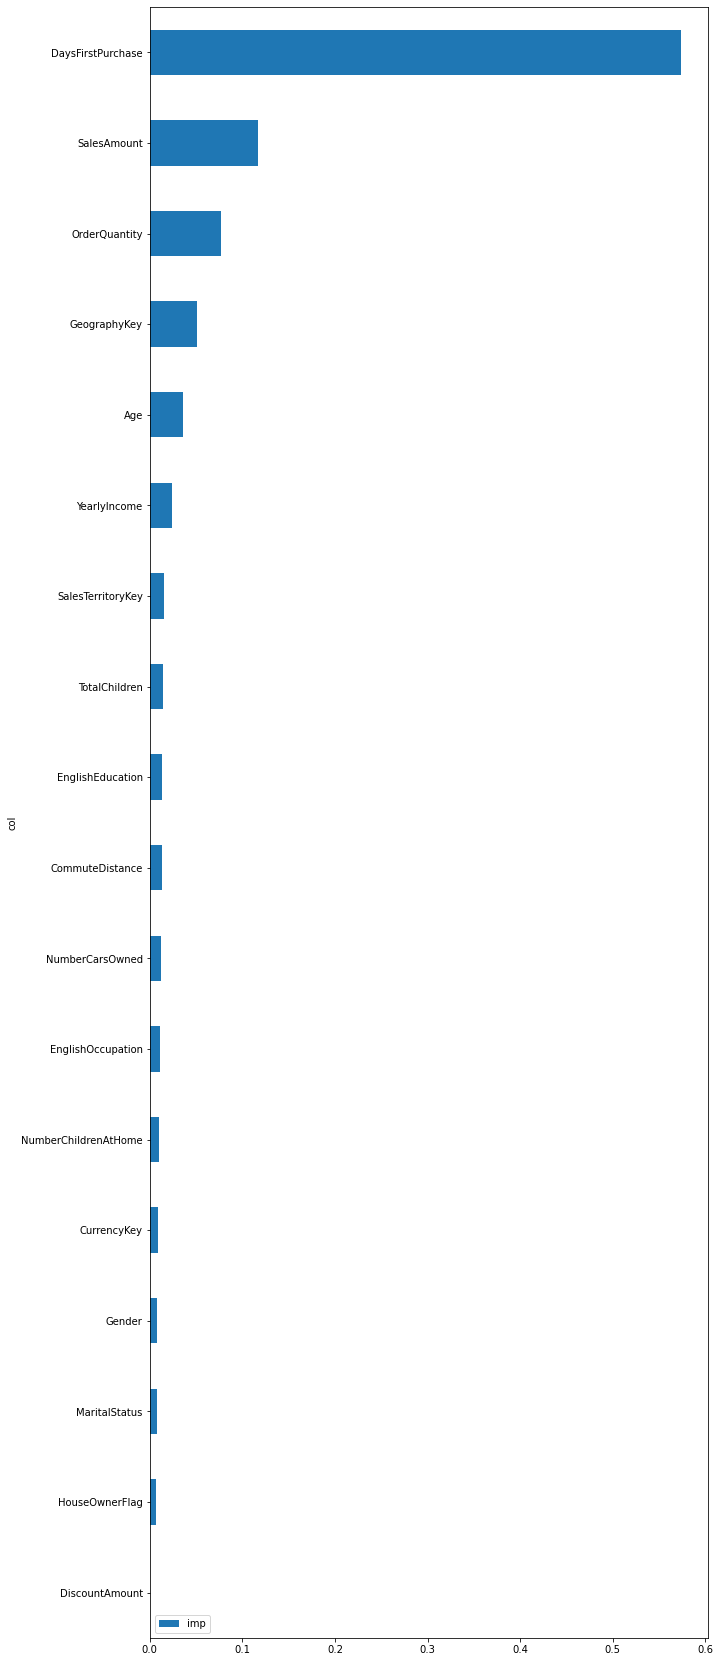

In [57]:
fea_imp = pd.DataFrame({'imp':clf.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-110:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 30))
plt.savefig('xgboost_feature_importance.png')
plt.show()

In [58]:
###Scoring our model

In [59]:
non_churn_data_score
x = non_churn_data_score.drop(['churn'], axis = 1)
y = non_churn_data_score['churn']

In [60]:
y_pred = clf.predict(x)
s = y_pred

In [61]:
from pandas import DataFrame
df = DataFrame (s, columns = ['churn'])

print(df)

      churn
0         0
1         0
2         0
3         0
4         0
...     ...
6457      0
6458      0
6459      0
6460      0
6461      0

[6462 rows x 1 columns]


In [62]:
df.churn.value_counts()


0    6057
1     405
Name: churn, dtype: int64

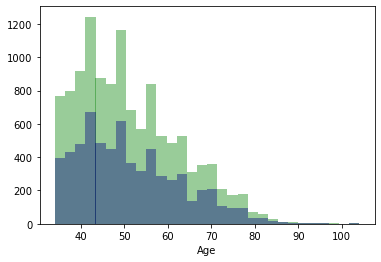

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.countplot(data = Cust_sales, x ='MaritalStatus', hue = 'churn').set(xticklabels = (['S', 'M']))
# plt.xticks(rotation = 45)
# sns.countplot(data = Cust_sales, x = 'TotalChildren', hue = 'churn')
# sns.countplot(data = Cust_sales, x = 'EnglishEducation', hue = 'churn').set(xticklabels = (['P H S', 'H S', 'P C E', 'B', 'G D']))
# sns.countplot(data = Cust_sales, x = 'EnglishOccupation', hue = 'churn').set(xticklabels = (['Manual', 'S M', 'C', 'M', 'P']))

# plt.figure(figsize=(16,9)) # figure ration 16:9
# sns.set()
grouped = Cust_sales.groupby(Cust_sales.churn) 
churned_grouped_Cust_sales = grouped.get_group(1)

# Age_churned_grouped_Cust_sales = churned_grouped_Cust_sales.get_group(churned_grouped_Cust_sales.Age)
#                 #group churned marital status to single
Non_churned_grouped_Cust_sales = grouped.get_group(0)
Age_Non_churned_grouped_Cust_sales = Non_churned_grouped_Cust_sales.groupby(Non_churned_grouped_Cust_sales.Age)

sns.distplot(Cust_sales["Age"], bins =30, kde = False, color = 'green')
sns.distplot(Non_churned_grouped_Cust_sales["Age"], bins =30, kde = False, color = 'navy')

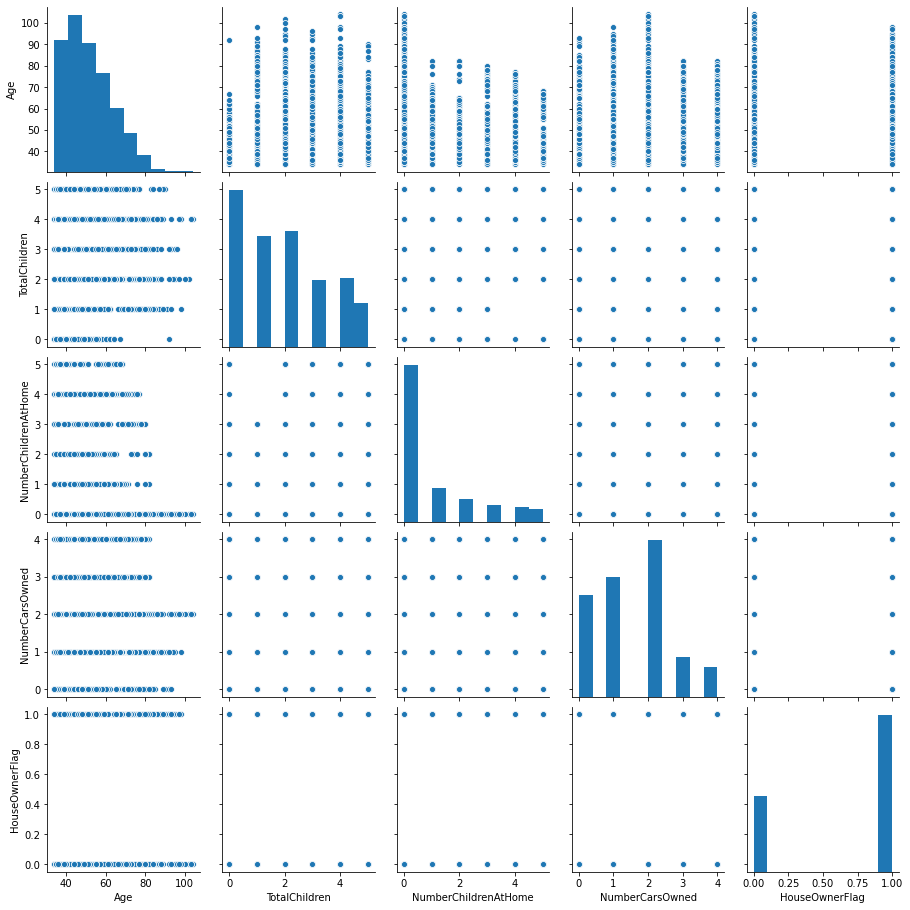

In [67]:
sns.pairplot(Cust_sales, vars = ['Age', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'HouseOwnerFlag'])